<a href="https://colab.research.google.com/github/BRIJNANDA1979/BIGEARTHNET/blob/main/BigEarthNet_k_means_Unsupervised_classiffication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.acgeospatial.co.uk/k-means-sentinel-2-python/

In [2]:
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

In [3]:
# Read in raster image
img_ds = gdal.Open('/content/drive/MyDrive/BigEathNet30_Geotif/S2A_MSIL2A_20170613T101031_0_45.tif', gdal.GA_ReadOnly)

band = img_ds.GetRasterBand(2)

img = band.ReadAsArray()

In [6]:
print(img.shape)

(20, 20)


In [7]:
#To use the classifier we need to reshape this array. For the classifier to accept the data we need to use the command .reshape(-1,1) and that means we want to flatten the data into the rows (unknown length) and keep the coloumns as 1. So our resulting array takes the form (rows, 1).

X = img.reshape((-1,1))

In [8]:
print(X.shape)

(400, 1)


In [15]:
k_means = cluster.KMeans(n_clusters=80)
k_means.fit(X)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img.shape)

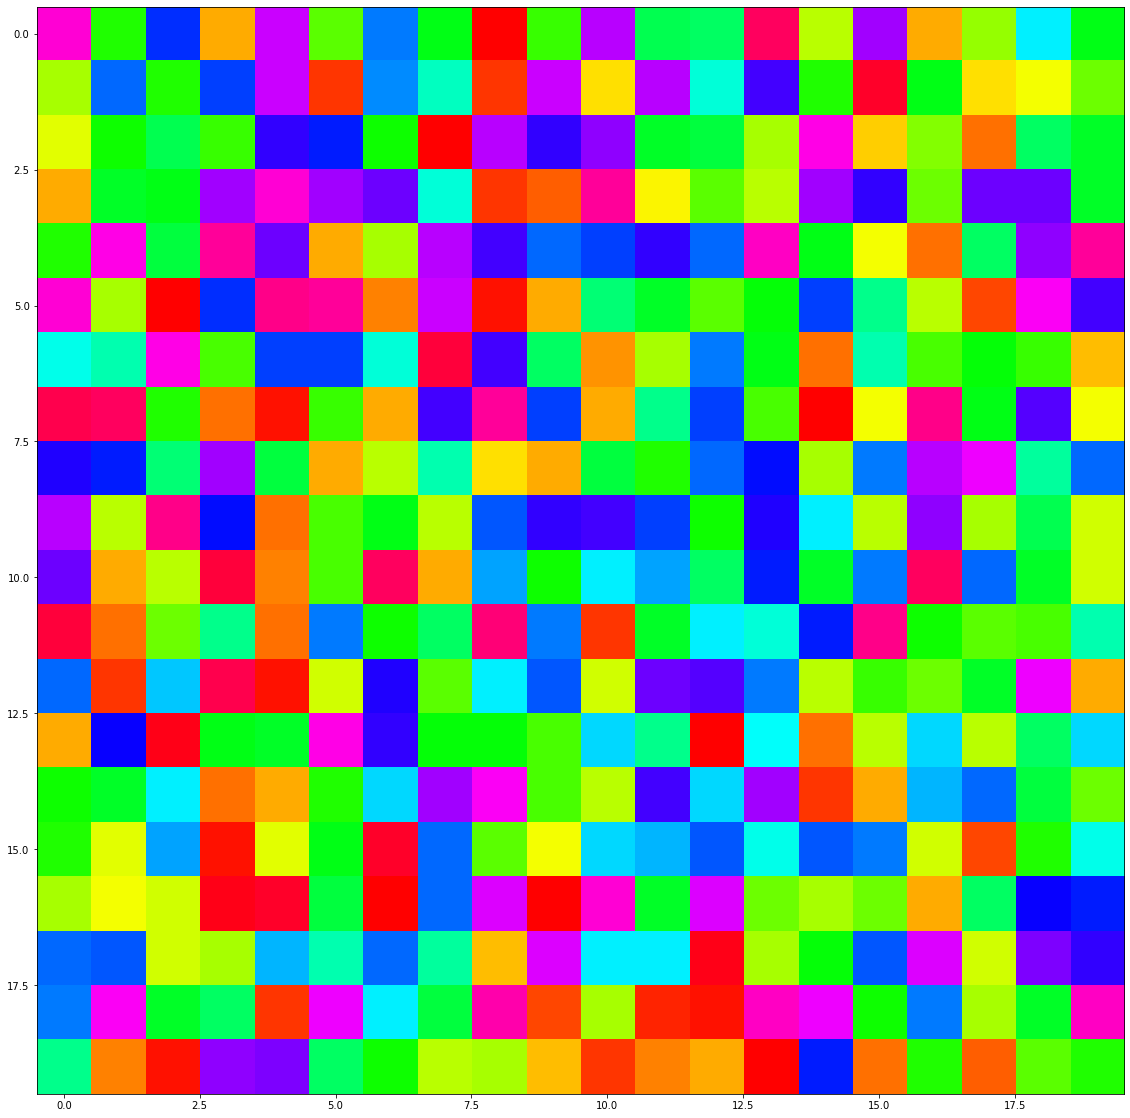

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")
plt.show()